# Stock price prediction with LSTM (Long Short Term Memory)

### Install packages 

In [1]:
!pip install --upgrade pip
!pip install yfinance

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


### Import packages

In [2]:
# fetch data and print stock data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
# get stock data
stock_data = yf.download('TATAELXSI.NS', start='2004-01-01', end='2023-12-31')
print(stock_data.head())
print(stock_data.shape)



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2004-01-01  60.849998  61.950001  60.599998  61.375000  39.528210   561346
2004-01-02  61.849998  65.675003  61.525002  64.050003  41.251038  2051598
2004-01-05  64.650002  65.500000  62.525002  63.125000  40.655289  1461746
2004-01-06  63.500000  64.699997  60.250000  60.924999  39.238392  1013920
2004-01-07  61.099998  61.349998  58.500000  59.424999  38.272331   764548
(4948, 6)


### Plot line chart based on closing price

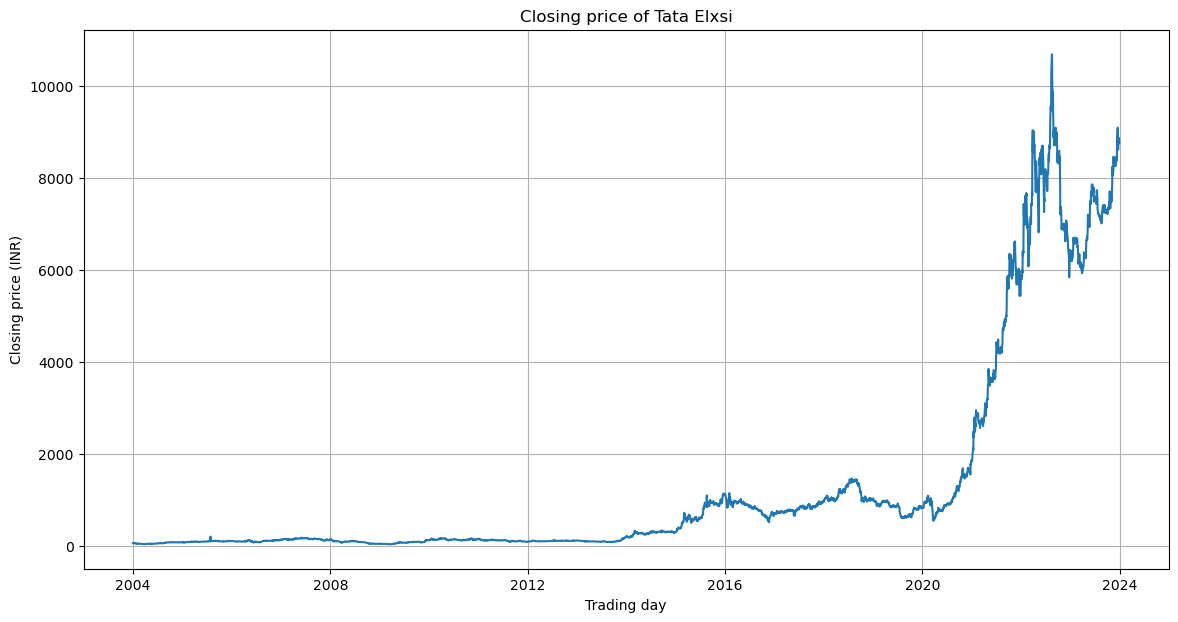

In [4]:
# plot line chart based on closing price
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'])
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()



In [5]:
# split data into training and test set

train_data = stock_data[:'2019-12-31']
test_data = stock_data['2020-01-01':]
print(train_data.shape)
print(test_data.shape)

(3956, 6)
(992, 6)


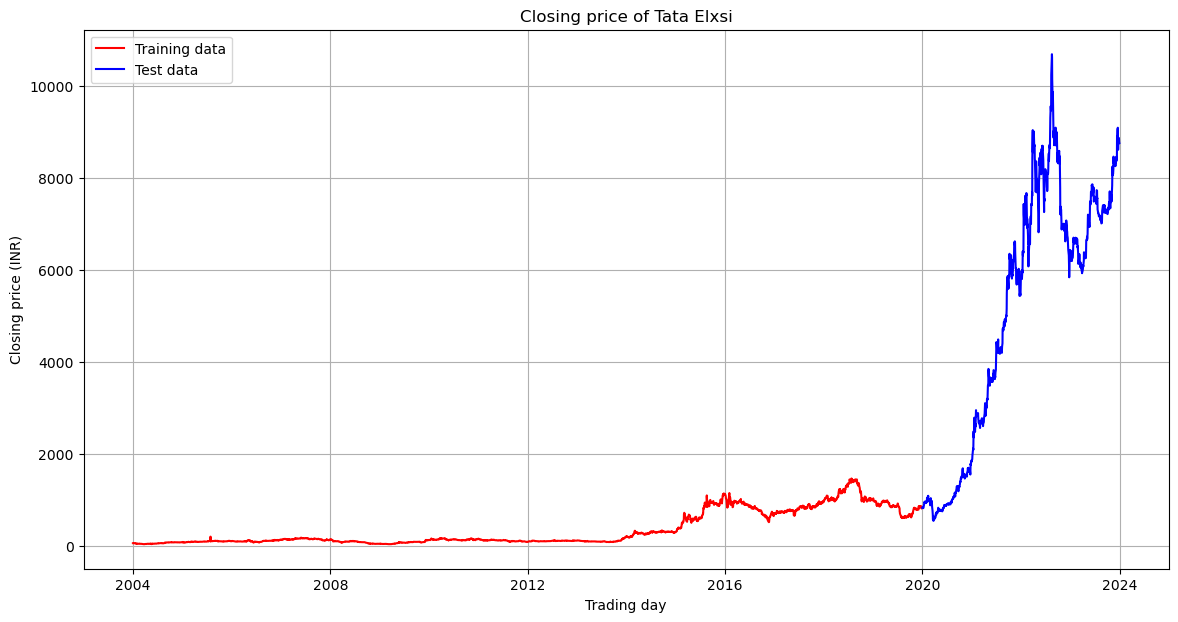

In [6]:
# plot line chart based on closing price

plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], 'red', label='Training data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.title('Closing price of Tata Elxsi')
plt.ylabel('Closing price (INR)')
plt.xlabel('Trading day')
plt.legend()
plt.grid(True)
plt.show()